In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

C:\Users\yishaie\Anaconda3\envs\p36workshop\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yishaie\Anaconda3\envs\p36workshop\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yishaie\Anaconda3\envs\p36workshop\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yishaie\Anaconda3\envs\p36workshop\lib\s

In [2]:
from keras.models import Sequential 
from keras.layers import Dense 

# a sequential model - each layer has one input tensor and one output tensor
# the output tensor is used as the input for the next layer

# we start with an empty model:
model = Sequential()

# our simple computational graph has one layer - a dense layer: y = W*X+b  
# (X is the input, y is the output, W are the weights, b is the 'bias')
# there is one input tensor that has two numbers - shape (2,)
layer = Dense(1, input_shape=(2,), activation=None, name='simple_layer')

# .... input_shape=(1080, 796, 3) ...

# add the layer to the model:
model.add(layer)

print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_layer (Dense)         (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


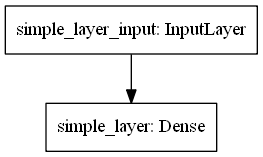

In [3]:
from keras.utils import plot_model 
plot_model(model,to_file = 'image.png')

In [4]:
# a single random input - 1 is the number of inputs, 2 is the shape of a single input
X = np.random.rand(1,2)
# X = np.random.rand(1, 1080, 796, 3)
print(X)

[[0.77127308 0.40338236]]


In [6]:
# Data
#-------------------

# the "secret" function:
def linear_function(X):
    # X is shape (None, 2)
    # W[0]=1, W[1]=2, b=1
    return 1*X[:,[0]] + 2*X[:,[1]] + 1

# Training data

# we need more data to train a network - let's try 1000:
X_train = np.random.rand(1000,2)
# the mapping to the output - x_0 + 2*x_1
y_train = linear_function(X_train)

# Validation data

# we would like to test the network's training by giving it data it hasn't "seen" before:
X_val = np.random.rand(100,2)
# the mapvalping to the output  is the same as before- x_0 + 2*x_1
y_val = linear_function(X_val)

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_val.shape: ", X_val.shape)
print("y_val.shape: ", y_val.shape)


X_train.shape:  (1000, 2)
y_train.shape:  (1000, 1)
X_val.shape:  (100, 2)
y_val.shape:  (100, 1)


In [10]:
# Loss, optimizer and metrics

from keras import losses
from keras import optimizers
from keras import metrics

mse = losses.MeanSquaredError() # can use inputs to configure MeanSquaredError, Adam, etc.
adam = optimizers.Adam()

rmse = metrics.RootMeanSquaredError()

model.compile(loss=mse, optimizer=adam, metrics = [rmse]) 
# some default inputs can be called with strings, e.g:
# model.compile(loss=mse, optimizer='adam', metrics = [rmse])

In [8]:
print("inputs: ", model.inputs)
print("outputs: ", model.outputs)

inputs:  [<tf.Tensor 'simple_layer_input:0' shape=(?, 2) dtype=float32>]
outputs:  [<tf.Tensor 'simple_layer/BiasAdd:0' shape=(?, 1) dtype=float32>]


In [11]:
# train the model:

# batch size - how many inputs to run in one forward pass:
bs = 10
# epochs - how many times to go over the entire data
e = 5

model.fit(X_train, y_train, epochs=e, batch_size=bs, validation_data = (X_val, y_val))


Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 0s 370us/step - loss: 1.7081 - root_mean_squared_error: 1.3069 - val_loss: 1.3802 - val_root_mean_squared_error: 1.1748
Epoch 2/5
1000/1000 [==============================] - 0s 144us/step - loss: 1.2460 - root_mean_squared_error: 1.1162 - val_loss: 0.9975 - val_root_mean_squared_error: 0.9988
Epoch 3/5
1000/1000 [==============================] - 0s 181us/step - loss: 0.8872 - root_mean_squared_error: 0.9419 - val_loss: 0.7050 - val_root_mean_squared_error: 0.8396
Epoch 4/5
1000/1000 [==============================] - 0s 266us/step - loss: 0.6168 - root_mean_squared_error: 0.7854 - val_loss: 0.4870 - val_root_mean_squared_error: 0.6978
Epoch 5/5
1000/1000 [==============================] - 0s 205us/step - loss: 0.4182 - root_mean_squared_error: 0.6467 - val_loss: 0.3294 - val_root_mean_squared_error: 0.5739


Text(0, 0.5, 'target')

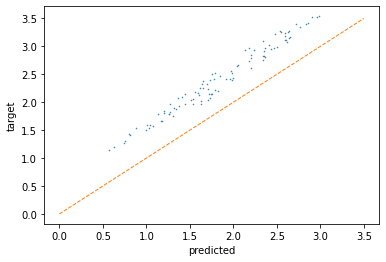

In [13]:
# the model trained for 5 epochs. How did it fare?
import matplotlib.pyplot as plt

# forward pass - calculate the output of the net on the inputs from the validation set:
y_predict_1 = model.predict(X_val)

# compare the predicted values and the actual output values (y_predict vs. y_val):

plt.plot(y_predict_1, y_val, '.', ms=1)
plt.plot([0,3.5], [0,3.5], '--', linewidth=1)
plt.xlabel('predicted')
plt.ylabel('target')

Train on 1000 samples, validate on 100 samples
Epoch 1/100
1000/1000 [==============================] - 0s 191us/step - loss: 0.2771 - root_mean_squared_error: 0.5264 - val_loss: 0.2186 - val_root_mean_squared_error: 0.4675
Epoch 2/100
1000/1000 [==============================] - 0s 159us/step - loss: 0.1802 - root_mean_squared_error: 0.4245 - val_loss: 0.1436 - val_root_mean_squared_error: 0.3790
Epoch 3/100
1000/1000 [==============================] - 0s 197us/step - loss: 0.1163 - root_mean_squared_error: 0.3410 - val_loss: 0.0947 - val_root_mean_squared_error: 0.3077
Epoch 4/100
1000/1000 [==============================] - 0s 180us/step - loss: 0.0757 - root_mean_squared_error: 0.2752 - val_loss: 0.0640 - val_root_mean_squared_error: 0.2529
Epoch 5/100
1000/1000 [==============================] - 0s 191us/step - loss: 0.0511 - root_mean_squared_error: 0.2260 - val_loss: 0.0454 - val_root_mean_squared_error: 0.2132
Epoch 6/100
1000/1000 [==============================] - 0s 320us/st

1000/1000 [==============================] - 0s 295us/step - loss: 3.0426e-04 - root_mean_squared_error: 0.0174 - val_loss: 2.8294e-04 - val_root_mean_squared_error: 0.0168
Epoch 47/100
1000/1000 [==============================] - 0s 192us/step - loss: 2.4274e-04 - root_mean_squared_error: 0.0156 - val_loss: 2.2470e-04 - val_root_mean_squared_error: 0.0150
Epoch 48/100
1000/1000 [==============================] - 0s 141us/step - loss: 1.9210e-04 - root_mean_squared_error: 0.0139 - val_loss: 1.7874e-04 - val_root_mean_squared_error: 0.0134
Epoch 49/100
1000/1000 [==============================] - 0s 277us/step - loss: 1.5002e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.3657e-04 - val_root_mean_squared_error: 0.0117
Epoch 50/100
1000/1000 [==============================] - 0s 156us/step - loss: 1.1627e-04 - root_mean_squared_error: 0.0108 - val_loss: 1.0615e-04 - val_root_mean_squared_error: 0.0103
Epoch 51/100
1000/1000 [==============================] - 0s 153us/step - loss: 8.8

Epoch 89/100
1000/1000 [==============================] - 0s 188us/step - loss: 2.3786e-12 - root_mean_squared_error: 1.5423e-06 - val_loss: 1.9865e-12 - val_root_mean_squared_error: 1.4094e-06
Epoch 90/100
1000/1000 [==============================] - 0s 203us/step - loss: 1.8127e-12 - root_mean_squared_error: 1.3464e-06 - val_loss: 1.6982e-12 - val_root_mean_squared_error: 1.3031e-06
Epoch 91/100
1000/1000 [==============================] - 0s 195us/step - loss: 1.7055e-12 - root_mean_squared_error: 1.3060e-06 - val_loss: 1.6982e-12 - val_root_mean_squared_error: 1.3031e-06
Epoch 92/100
1000/1000 [==============================] - 0s 149us/step - loss: 1.7011e-12 - root_mean_squared_error: 1.3042e-06 - val_loss: 1.5817e-12 - val_root_mean_squared_error: 1.2576e-06
Epoch 93/100
1000/1000 [==============================] - 0s 171us/step - loss: 1.3459e-12 - root_mean_squared_error: 1.1601e-06 - val_loss: 1.2783e-12 - val_root_mean_squared_error: 1.1306e-06
Epoch 94/100
1000/1000 [======

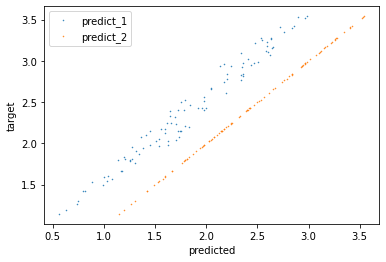

In [14]:
# Not bad! But can be improved...

model.fit(X_train, y_train, epochs=100, batch_size = bs, validation_data = (X_val, y_val))

y_predict_2 = model.predict(X_val)

plt.plot(y_predict_1, y_val, '.', ms=1, label='predict_1')
plt.plot(y_predict_2, y_val, '.', ms=1, label='predict_2')
plt.xlabel('predicted')
plt.ylabel('target')
plt.legend()

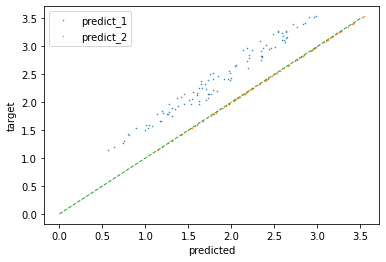

In [15]:
plt.plot(y_predict_1, y_val, '.', ms=1, label='predict_1')
plt.plot(y_predict_2, y_val, '.', ms=1, label='predict_2')
plt.plot([0,3.5], [0,3.5], '--', linewidth=1)
plt.xlabel('predicted')
plt.ylabel('target')
plt.legend()

In [16]:
# That was easy! Linear = Easy; Easy = Not interesting. Let's try a non-linear function: 

# a non-linear function:
def non_linear_function(X):
    return np.exp(X[:,[0]] + 2*X[:,[1]]) + 1

# Training data

# we need more data to train a network - let's try 1000:
X_train = np.random.rand(1000,2)
# the mapping to the output - x_0 + 2*x_1
y_train = non_linear_function(X_train)

# Validation data

# we would like to test the network's training by giving it data it hasn't "seen" before:
X_val = np.random.rand(100,2)
# the mapvalping to the output  is the same as before- x_0 + 2*x_1
y_val = non_linear_function(X_val)

print(X_val.shape)

(100, 2)


In [17]:
model_2 = Sequential()

layer = Dense(1, input_shape = (2,), activation=None, name='simple_layer')
model_2.add(layer)
adam = optimizers.Adam()
rmse = metrics.RootMeanSquaredError()
mse  = losses.MeanSquaredError()
model_2.compile(loss=mse, optimizer=adam, metrics = [rmse]) 

model_2.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val, y_val))


Train on 1000 samples, validate on 100 samples
Epoch 1/100
1000/1000 [==============================] - 0s 394us/step - loss: 72.2889 - root_mean_squared_error: 8.5023 - val_loss: 65.5665 - val_root_mean_squared_error: 8.0973
Epoch 2/100
1000/1000 [==============================] - 0s 156us/step - loss: 69.1595 - root_mean_squared_error: 8.3162 - val_loss: 62.6608 - val_root_mean_squared_error: 7.9159
Epoch 3/100
1000/1000 [==============================] - 0s 200us/step - loss: 66.1176 - root_mean_squared_error: 8.1313 - val_loss: 59.8491 - val_root_mean_squared_error: 7.7362
Epoch 4/100
1000/1000 [==============================] - 0s 322us/step - loss: 63.2040 - root_mean_squared_error: 7.9501 - val_loss: 57.1217 - val_root_mean_squared_error: 7.5579
Epoch 5/100
1000/1000 [==============================] - 0s 204us/step - loss: 60.4032 - root_mean_squared_error: 7.7719 - val_loss: 54.5345 - val_root_mean_squared_error: 7.3847
Epoch 6/100
1000/1000 [==============================] - 0

1000/1000 [==============================] - 0s 161us/step - loss: 8.7569 - root_mean_squared_error: 2.9592 - val_loss: 7.9568 - val_root_mean_squared_error: 2.8208
Epoch 47/100
1000/1000 [==============================] - 0s 174us/step - loss: 8.4877 - root_mean_squared_error: 2.9134 - val_loss: 7.7541 - val_root_mean_squared_error: 2.7846
Epoch 48/100
1000/1000 [==============================] - 0s 139us/step - loss: 8.2458 - root_mean_squared_error: 2.8715 - val_loss: 7.5574 - val_root_mean_squared_error: 2.7491
Epoch 49/100
1000/1000 [==============================] - 0s 141us/step - loss: 8.0223 - root_mean_squared_error: 2.8324 - val_loss: 7.3898 - val_root_mean_squared_error: 2.7184
Epoch 50/100
1000/1000 [==============================] - 0s 142us/step - loss: 7.8227 - root_mean_squared_error: 2.7969 - val_loss: 7.2350 - val_root_mean_squared_error: 2.6898
Epoch 51/100
1000/1000 [==============================] - 0s 146us/step - loss: 7.6395 - root_mean_squared_error: 2.7640 - 

1000/1000 [==============================] - 0s 139us/step - loss: 4.8021 - root_mean_squared_error: 2.1914 - val_loss: 4.5999 - val_root_mean_squared_error: 2.1447
Epoch 93/100
1000/1000 [==============================] - 0s 130us/step - loss: 4.7489 - root_mean_squared_error: 2.1792 - val_loss: 4.5457 - val_root_mean_squared_error: 2.1321
Epoch 94/100
1000/1000 [==============================] - 0s 122us/step - loss: 4.6965 - root_mean_squared_error: 2.1671 - val_loss: 4.4907 - val_root_mean_squared_error: 2.1191
Epoch 95/100
1000/1000 [==============================] - 0s 123us/step - loss: 4.6435 - root_mean_squared_error: 2.1549 - val_loss: 4.4343 - val_root_mean_squared_error: 2.1058
Epoch 96/100
1000/1000 [==============================] - 0s 129us/step - loss: 4.5927 - root_mean_squared_error: 2.1431 - val_loss: 4.3810 - val_root_mean_squared_error: 2.0931
Epoch 97/100
1000/1000 [==============================] - 0s 145us/step - loss: 4.5411 - root_mean_squared_error: 2.1310 - 

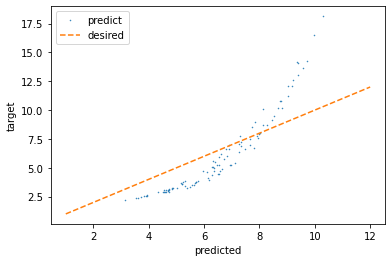

In [18]:
y_predict = model_2.predict(X_val)

plt.plot(y_predict, y_val, '.', ms=1, label='predict')
plt.plot([1,12], [1,12], '--', label='desired')
plt.xlabel('predicted')
plt.ylabel('target')
plt.legend()

In [19]:
model_3 = Sequential()

input_layer = Dense(1, input_shape = (2,), activation=None, name='input_layer')
model_3.add(input_layer)
for i in range(10):
    layer = Dense(1, input_shape = (1,), activation=None, name='simple_layer_' + str(i))
    model_3.add(layer)
    
adam = optimizers.Adam()
rmse = metrics.RootMeanSquaredError()
mse  = losses.MeanSquaredError()
model_3.compile(loss=mse, optimizer=adam, metrics = [rmse]) 

model_3.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val, y_val))

Train on 1000 samples, validate on 100 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 47.9402 - root_mean_squared_error: 6.9239 - val_loss: 36.9195 - val_root_mean_squared_error: 6.0761
Epoch 2/100
1000/1000 [==============================] - 0s 426us/step - loss: 27.9031 - root_mean_squared_error: 5.2823 - val_loss: 13.7774 - val_root_mean_squared_error: 3.7118
Epoch 3/100
1000/1000 [==============================] - 0s 322us/step - loss: 12.1880 - root_mean_squared_error: 3.4911 - val_loss: 11.3195 - val_root_mean_squared_error: 3.3644
Epoch 4/100
1000/1000 [==============================] - 0s 315us/step - loss: 11.4214 - root_mean_squared_error: 3.3796 - val_loss: 10.8972 - val_root_mean_squared_error: 3.3011
Epoch 5/100
1000/1000 [==============================] - 0s 336us/step - loss: 10.9323 - root_mean_squared_error: 3.3064 - val_loss: 10.2926 - val_root_mean_squared_error: 3.2082
Epoch 6/100
1000/1000 [==============================] - 0s 

Epoch 47/100
1000/1000 [==============================] - 0s 355us/step - loss: 1.4378 - root_mean_squared_error: 1.1991 - val_loss: 1.2794 - val_root_mean_squared_error: 1.1311
Epoch 48/100
1000/1000 [==============================] - 0s 370us/step - loss: 1.4463 - root_mean_squared_error: 1.2026 - val_loss: 1.2752 - val_root_mean_squared_error: 1.1292
Epoch 49/100
1000/1000 [==============================] - 0s 341us/step - loss: 1.4468 - root_mean_squared_error: 1.2028 - val_loss: 1.3098 - val_root_mean_squared_error: 1.1445
Epoch 50/100
1000/1000 [==============================] - 0s 354us/step - loss: 1.4547 - root_mean_squared_error: 1.2061 - val_loss: 1.2684 - val_root_mean_squared_error: 1.1263
Epoch 51/100
1000/1000 [==============================] - 0s 365us/step - loss: 1.4413 - root_mean_squared_error: 1.2005 - val_loss: 1.2755 - val_root_mean_squared_error: 1.1294
Epoch 52/100
1000/1000 [==============================] - 0s 309us/step - loss: 1.4492 - root_mean_squared_err

1000/1000 [==============================] - 0s 312us/step - loss: 1.4670 - root_mean_squared_error: 1.2112 - val_loss: 1.2747 - val_root_mean_squared_error: 1.1290
Epoch 93/100
1000/1000 [==============================] - 0s 342us/step - loss: 1.4459 - root_mean_squared_error: 1.2024 - val_loss: 1.2796 - val_root_mean_squared_error: 1.1312
Epoch 94/100
1000/1000 [==============================] - 0s 380us/step - loss: 1.4327 - root_mean_squared_error: 1.1969 - val_loss: 1.2702 - val_root_mean_squared_error: 1.1270
Epoch 95/100
1000/1000 [==============================] - 0s 334us/step - loss: 1.4309 - root_mean_squared_error: 1.1962 - val_loss: 1.2801 - val_root_mean_squared_error: 1.1314
Epoch 96/100
1000/1000 [==============================] - 0s 316us/step - loss: 1.4657 - root_mean_squared_error: 1.2107 - val_loss: 1.2822 - val_root_mean_squared_error: 1.1323
Epoch 97/100
1000/1000 [==============================] - 0s 342us/step - loss: 1.4471 - root_mean_squared_error: 1.2029 - 

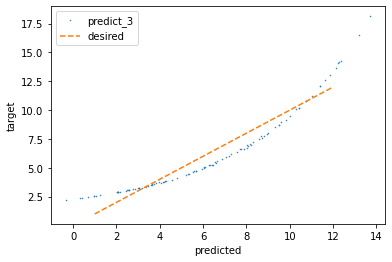

In [20]:
y_predict_3 = model_3.predict(X_val)

plt.plot(y_predict_3, y_val, '.', ms=1, label='predict_3')
plt.plot([1,12], [1,12], '--', label='desired')
plt.xlabel('predicted')
plt.ylabel('target')
plt.legend()

In [21]:
#Horrible! What is wrong?
model_4 = Sequential()

input_layer = Dense(1, input_shape = (2,), activation='relu', name='input_layer')
model_4.add(input_layer)
for i in range(10):
    layer = Dense(1, input_shape = (1,), activation='relu', name='simple_layer_' + str(i))
    model_4.add(layer)
    
adam = optimizers.Adam()
rmse = metrics.RootMeanSquaredError()
mse  = losses.MeanSquaredError()
model_4.compile(loss=mse, optimizer=adam, metrics = [rmse]) 

model_4.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val, y_val))

Train on 1000 samples, validate on 100 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 2/100
1000/1000 [==============================] - 0s 358us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 3/100
1000/1000 [==============================] - 0s 364us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 4/100
1000/1000 [==============================] - 0s 354us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 5/100
1000/1000 [==============================] - 0s 358us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 6/100
1000/1000 [==============================] - 0s 

1000/1000 [==============================] - 0s 382us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 47/100
1000/1000 [==============================] - 0s 334us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 48/100
1000/1000 [==============================] - 0s 351us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 49/100
1000/1000 [==============================] - 0s 406us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 50/100
1000/1000 [==============================] - 0s 347us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 51/100
1000/1000 [==============================] - 0s 440us/step - loss: 53.8697 - root_mean_squared_error

1000/1000 [==============================] - 0s 477us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 92/100
1000/1000 [==============================] - 0s 484us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 93/100
1000/1000 [==============================] - 0s 485us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 94/100
1000/1000 [==============================] - 0s 449us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 95/100
1000/1000 [==============================] - 0s 360us/step - loss: 53.8697 - root_mean_squared_error: 7.3396 - val_loss: 49.8759 - val_root_mean_squared_error: 7.0623
Epoch 96/100
1000/1000 [==============================] - 0s 370us/step - loss: 53.8697 - root_mean_squared_error

In [22]:
#Even worse! How can we correct?
model_5 = Sequential()

input_layer = Dense(16, input_shape = (2,), activation='relu', name='input_layer')
model_5.add(input_layer)
for i in range(10):
    layer = Dense(16, input_shape = (16,), activation='relu', name='simple_layer_' + str(i))
    model_5.add(layer)
output_layer = Dense(1, input_shape=(16,), activation=None, name='output_layer')
model_5.add(output_layer)
    
adam = optimizers.Adam()
rmse = metrics.RootMeanSquaredError()
mse  = losses.MeanSquaredError()
model_5.compile(loss=mse, optimizer=adam, metrics = [rmse]) 

history_5 = model_5.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_val, y_val))

Train on 1000 samples, validate on 100 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 23.3451 - root_mean_squared_error: 4.8317 - val_loss: 5.1427 - val_root_mean_squared_error: 2.2677
Epoch 2/100
1000/1000 [==============================] - 1s 503us/step - loss: 2.9793 - root_mean_squared_error: 1.7261 - val_loss: 1.1632 - val_root_mean_squared_error: 1.0785
Epoch 3/100
1000/1000 [==============================] - 0s 490us/step - loss: 0.9082 - root_mean_squared_error: 0.9530 - val_loss: 0.4147 - val_root_mean_squared_error: 0.6440
Epoch 4/100
1000/1000 [==============================] - 0s 499us/step - loss: 0.3794 - root_mean_squared_error: 0.6160 - val_loss: 0.2082 - val_root_mean_squared_error: 0.4563
Epoch 5/100
1000/1000 [==============================] - 0s 488us/step - loss: 0.2182 - root_mean_squared_error: 0.4671 - val_loss: 0.2819 - val_root_mean_squared_error: 0.5309
Epoch 6/100
1000/1000 [==============================] - 0s 449us/ste

1000/1000 [==============================] - 0s 495us/step - loss: 0.0297 - root_mean_squared_error: 0.1724 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0865
Epoch 47/100
1000/1000 [==============================] - 0s 389us/step - loss: 0.0077 - root_mean_squared_error: 0.0875 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664
Epoch 48/100
1000/1000 [==============================] - 0s 374us/step - loss: 0.0276 - root_mean_squared_error: 0.1661 - val_loss: 0.0348 - val_root_mean_squared_error: 0.1866
Epoch 49/100
1000/1000 [==============================] - 0s 385us/step - loss: 0.0079 - root_mean_squared_error: 0.0887 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 50/100
1000/1000 [==============================] - 0s 417us/step - loss: 0.0044 - root_mean_squared_error: 0.0666 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0405
Epoch 51/100
1000/1000 [==============================] - 0s 435us/step - loss: 0.0033 - root_mean_squared_error: 0.0575 - 

Epoch 92/100
1000/1000 [==============================] - 0s 441us/step - loss: 0.0024 - root_mean_squared_error: 0.0489 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0897
Epoch 93/100
1000/1000 [==============================] - 0s 500us/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 6.5877e-04 - val_root_mean_squared_error: 0.0257
Epoch 94/100
1000/1000 [==============================] - 0s 442us/step - loss: 0.0106 - root_mean_squared_error: 0.1028 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0603
Epoch 95/100
1000/1000 [==============================] - 0s 434us/step - loss: 0.0021 - root_mean_squared_error: 0.0462 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0379
Epoch 96/100
1000/1000 [==============================] - 0s 431us/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0424
Epoch 97/100
1000/1000 [==============================] - 0s 425us/step - loss: 0.0128 - root_mean_squared

In [ ]:
print(model_5.summary())
plot_model(model_5,to_file = 'image_5.png')

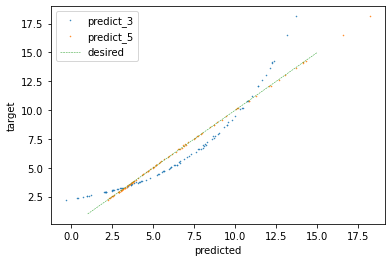

In [23]:
y_predict_5 = model_5.predict(X_val)

plt.plot(y_predict_3, y_val, '.', ms=1, label='predict_3')
plt.plot(y_predict_5, y_val, '.', ms=1, label='predict_5')
plt.plot([1,15], [1,15], '--', linewidth=0.5, label='desired')
plt.xlabel('predicted')
plt.ylabel('target')
plt.legend()

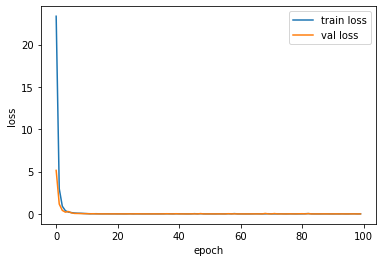

In [25]:
plt.plot(history_5.history['loss'], label='train loss')
plt.plot(history_5.history['val_loss'], label = 'val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [26]:
#demonstration of overfit:
model_6 = Sequential()

input_layer = Dense(64, input_shape = (2,), activation='relu', name='input_layer')
model_6.add(input_layer)
for i in range(30):
    layer = Dense(64, input_shape = (64,), activation='relu', name='simple_layer_' + str(i))
    model_6.add(layer)
output_layer = Dense(1, input_shape=(64,), activation=None, name='output_layer')
model_6.add(output_layer)
    
adam = optimizers.Adam()
rmse = metrics.RootMeanSquaredError()
mse  = losses.MeanSquaredError()
model_6.compile(loss=mse, optimizer=adam, metrics = [rmse]) 

In [27]:
print(model_6.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 64)                192       
_________________________________________________________________
simple_layer_0 (Dense)       (None, 64)                4160      
_________________________________________________________________
simple_layer_1 (Dense)       (None, 64)                4160      
_________________________________________________________________
simple_layer_2 (Dense)       (None, 64)                4160      
_________________________________________________________________
simple_layer_3 (Dense)       (None, 64)                4160      
_________________________________________________________________
simple_layer_4 (Dense)       (None, 64)                4160      
_________________________________________________________________
simple_layer_5 (Dense)       (None, 64)               

In [28]:
history_6 = model_6.fit(X_train[:10], y_train[:10], epochs=250, batch_size=10, validation_data = (X_val, y_val))

Train on 10 samples, validate on 100 samples
Epoch 1/250
10/10 [==============================] - 3s 343ms/step - loss: 50.3212 - root_mean_squared_error: 7.0937 - val_loss: 49.7288 - val_root_mean_squared_error: 7.0519
Epoch 2/250
10/10 [==============================] - 0s 4ms/step - loss: 50.1609 - root_mean_squared_error: 7.0824 - val_loss: 49.5467 - val_root_mean_squared_error: 7.0389
Epoch 3/250
10/10 [==============================] - 0s 4ms/step - loss: 49.9624 - root_mean_squared_error: 7.0684 - val_loss: 49.3051 - val_root_mean_squared_error: 7.0218
Epoch 4/250
10/10 [==============================] - 0s 6ms/step - loss: 49.6990 - root_mean_squared_error: 7.0498 - val_loss: 49.0096 - val_root_mean_squared_error: 7.0007
Epoch 5/250
10/10 [==============================] - 0s 6ms/step - loss: 49.3765 - root_mean_squared_error: 7.0268 - val_loss: 48.6492 - val_root_mean_squared_error: 6.9749
Epoch 6/250
10/10 [==============================] - 0s 5ms/step - loss: 48.9827 - root_

Epoch 49/250
10/10 [==============================] - 0s 7ms/step - loss: 2.7527 - root_mean_squared_error: 1.6591 - val_loss: 5.8492 - val_root_mean_squared_error: 2.4185
Epoch 50/250
10/10 [==============================] - 0s 6ms/step - loss: 2.4397 - root_mean_squared_error: 1.5620 - val_loss: 5.7154 - val_root_mean_squared_error: 2.3907
Epoch 51/250
10/10 [==============================] - 0s 7ms/step - loss: 2.2217 - root_mean_squared_error: 1.4905 - val_loss: 5.8111 - val_root_mean_squared_error: 2.4106
Epoch 52/250
10/10 [==============================] - 0s 8ms/step - loss: 2.2379 - root_mean_squared_error: 1.4960 - val_loss: 5.9483 - val_root_mean_squared_error: 2.4389
Epoch 53/250
10/10 [==============================] - 0s 6ms/step - loss: 2.3397 - root_mean_squared_error: 1.5296 - val_loss: 5.8277 - val_root_mean_squared_error: 2.4141
Epoch 54/250
10/10 [==============================] - 0s 6ms/step - loss: 2.2575 - root_mean_squared_error: 1.5025 - val_loss: 5.4709 - val_

Epoch 97/250
10/10 [==============================] - 0s 6ms/step - loss: 0.4207 - root_mean_squared_error: 0.6486 - val_loss: 2.0262 - val_root_mean_squared_error: 1.4234
Epoch 98/250
10/10 [==============================] - 0s 8ms/step - loss: 0.4037 - root_mean_squared_error: 0.6353 - val_loss: 1.9734 - val_root_mean_squared_error: 1.4048
Epoch 99/250
10/10 [==============================] - 0s 7ms/step - loss: 0.3825 - root_mean_squared_error: 0.6185 - val_loss: 1.9037 - val_root_mean_squared_error: 1.3797
Epoch 100/250
10/10 [==============================] - 0s 4ms/step - loss: 0.3623 - root_mean_squared_error: 0.6019 - val_loss: 1.8411 - val_root_mean_squared_error: 1.3569
Epoch 101/250
10/10 [==============================] - 0s 4ms/step - loss: 0.3473 - root_mean_squared_error: 0.5893 - val_loss: 1.7966 - val_root_mean_squared_error: 1.3404
Epoch 102/250
10/10 [==============================] - 0s 7ms/step - loss: 0.3287 - root_mean_squared_error: 0.5733 - val_loss: 1.7716 - v

Epoch 145/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0298 - root_mean_squared_error: 0.1725 - val_loss: 1.0106 - val_root_mean_squared_error: 1.0053
Epoch 146/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0280 - root_mean_squared_error: 0.1672 - val_loss: 0.9995 - val_root_mean_squared_error: 0.9998
Epoch 147/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0264 - root_mean_squared_error: 0.1624 - val_loss: 1.0102 - val_root_mean_squared_error: 1.0051
Epoch 148/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0246 - root_mean_squared_error: 0.1569 - val_loss: 0.9983 - val_root_mean_squared_error: 0.9991
Epoch 149/250
10/10 [==============================] - 0s 8ms/step - loss: 0.0229 - root_mean_squared_error: 0.1513 - val_loss: 0.9851 - val_root_mean_squared_error: 0.9925
Epoch 150/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0213 - root_mean_squared_error: 0.1460 - val_loss: 0.9898 

Epoch 193/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - root_mean_squared_error: 0.0613 - val_loss: 0.8199 - val_root_mean_squared_error: 0.9055
Epoch 194/250
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.8441 - val_root_mean_squared_error: 0.9187
Epoch 195/250
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - root_mean_squared_error: 0.0635 - val_loss: 0.8182 - val_root_mean_squared_error: 0.9045
Epoch 196/250
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - root_mean_squared_error: 0.0609 - val_loss: 0.8259 - val_root_mean_squared_error: 0.9088
Epoch 197/250
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - root_mean_squared_error: 0.0588 - val_loss: 0.8320 - val_root_mean_squared_error: 0.9122
Epoch 198/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - root_mean_squared_error: 0.0594 - val_loss: 0.8113 

Epoch 241/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0390 - val_loss: 0.7244 - val_root_mean_squared_error: 0.8511
Epoch 242/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0393 - val_loss: 0.7430 - val_root_mean_squared_error: 0.8620
Epoch 243/250
10/10 [==============================] - 0s 7ms/step - loss: 0.0016 - root_mean_squared_error: 0.0401 - val_loss: 0.7166 - val_root_mean_squared_error: 0.8465
Epoch 244/250
10/10 [==============================] - 0s 10ms/step - loss: 0.0017 - root_mean_squared_error: 0.0417 - val_loss: 0.7461 - val_root_mean_squared_error: 0.8638
Epoch 245/250
10/10 [==============================] - 0s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.7075 - val_root_mean_squared_error: 0.8411
Epoch 246/250
10/10 [==============================] - 0s 10ms/step - loss: 0.0023 - root_mean_squared_error: 0.0481 - val_loss: 0.752

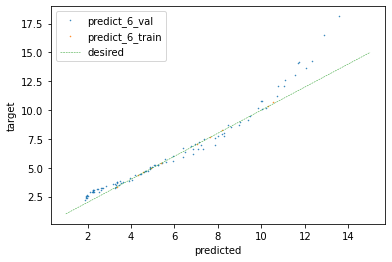

In [33]:
y_predict_6 = model_6.predict(X_val)
y_predict_6_train = model_6.predict(X_train[:10])

plt.plot(y_predict_6, y_val, '.', ms=1, label='predict_6_val')
plt.plot(y_predict_6_train, y_train[0:10], '.', ms=1, label='predict_6_train')
plt.plot([1,15], [1,15], '--', linewidth=0.5, label='desired')
plt.xlabel('predicted')
plt.ylabel('target')
plt.legend()

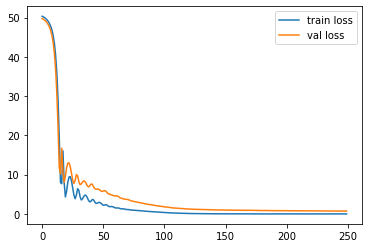

In [34]:
# how overfit looks like in the history: Train loss goes to zero, val loss stays high
plt.plot(history_6.history['loss'], label='train loss')
plt.plot(history_6.history['val_loss'], label = 'val loss')
plt.legend()